In [1]:
pwd

'/home/karthi/work_main/project/cbp2025'

In [2]:
import sys
import pandas as pd
from itertools import combinations
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
headers = ["seq_no", "piece", "pc", "next_pc", "execute_cycle", "pred_dir", "resolve_dir"]

In [4]:
df = pd.read_csv("output/int_0_trace/int_0_trace_history.log", names=headers, header=None) 

In [5]:
df.head(10)

,seq_no,piece,pc,next_pc,execute_cycle,pred_dir,resolve_dir
0,1a,0,8000036c,80000370,1081,0,0
1,55,0,80001924,800019cc,1564,0,1
2,d1,0,fffff21b4c80,fffff21b4ca4,2764,0,1
3,d4,0,fffff21b4cac,fffff21b4aec,2775,0,1
4,e7,0,fffff21b4b34,fffff21b4b38,3427,0,0
5,127,0,fffff21b4c24,fffff21b4c48,3769,0,1
6,136,0,fffff21b4c80,fffff21b4ca4,3781,1,1
7,139,0,fffff21b4cac,fffff21b4aec,3781,1,1
8,14c,0,fffff21b4b34,fffff21b4b38,3787,0,0
9,19e,0,fffff21b4cac,fffff21b4aec,3788,1,1


In [6]:
global_history = ''.join(map(str, df['resolve_dir']))

In [7]:
gh=[]
history_length = 64
for i in range(len(df)):
    gh.append(global_history[max(0,i-history_length):i].zfill(history_length))

df['global_history'] = gh

In [10]:
# Function to compute Hamming distance between two binary strings
def hamming_distance(s1, s2):
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

In [25]:
pairwise_results = []
from_index = 1000
to_index = 2000
total_combinations = len(df.iloc[from_index:to_index]) * (len(df.iloc[from_index:to_index]) - 1) // 2
with tqdm(total=total_combinations, file=sys.stdout) as pbar:
    for (idx1, row1), (idx2, row2) in combinations(df[["global_history","resolve_dir"]].iloc[from_index:to_index].iterrows(), 2):
        dist = hamming_distance(row1["global_history"], row2["global_history"])
        same_outcome = (row1["resolve_dir"] == row2["resolve_dir"])
        pairwise_results.append((row1["global_history"], row2["global_history"], dist, same_outcome))
        pbar.update(1)

distance_df = pd.DataFrame(pairwise_results, columns=["global_history1", "global_history2", "hamming_distance", "same_outcome"])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499500/499500 [00:04<00:00, 100621.77it/s]


In [26]:
analysis3 = distance_df.groupby("hamming_distance")["same_outcome"].mean().reset_index()

In [27]:
analysis3

,hamming_distance,same_outcome
0,0,0.989902
1,1,0.851332
2,2,0.858025
3,3,0.891185
4,4,0.886436
5,5,0.889554
6,6,0.882477
7,7,0.879259
8,8,0.852639
9,9,0.844232


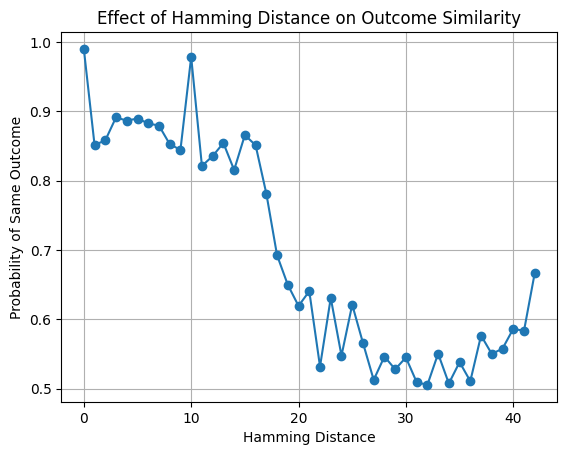

In [28]:
plt.plot(analysis3["hamming_distance"], analysis3["same_outcome"], marker='o')
plt.xlabel("Hamming Distance")
plt.ylabel("Probability of Same Outcome")
plt.title("Effect of Hamming Distance on Outcome Similarity")
plt.grid(True)
plt.show()

In [50]:
grouped_df = df[df["pred_dir"]!=df["resolve_dir"]].groupby("pc").agg(
    count=("pc", "count")
).reset_index()

In [51]:
grouped_df

,pc,count
0,80001924,1
1,ffff800008011410,1
2,ffff80000801143c,1
3,ffff800008011e18,1
4,ffff800008011e54,1
...,...,...
372,fffff224c59c,1
373,fffff224c5c0,1
374,fffff224c694,1
375,fffff224c6c0,1


In [8]:
mispred_df = df[df["pred_dir"]!=df["resolve_dir"]]

In [12]:
mispred_df

,seq_no,piece,pc,next_pc,execute_cycle,pred_dir,resolve_dir,global_history
1,55,0,80001924,800019cc,1564,0,1,0000000000000000000000000000000000000000000000...
2,d1,0,fffff21b4c80,fffff21b4ca4,2764,0,1,0000000000000000000000000000000000000000000000...
3,d4,0,fffff21b4cac,fffff21b4aec,2775,0,1,0000000000000000000000000000000000000000000000...
5,127,0,fffff21b4c24,fffff21b4c48,3769,0,1,0000000000000000000000000000000000000000000000...
380,263d,0,ffff800008011410,ffff800008011424,8313,0,1,0111011101110111011101110111011101110111011101...
...,...,...,...,...,...,...,...,...
6223081,27d4945,0,fffff21fe14c,fffff21fe53c,14704664,0,1,0000000000000000000011101111111111111111001001...
6223124,27d4b9e,0,fffff21fae30,fffff21fae34,14704725,1,0,0010010100001000000001111111110011011100001101...
6223183,27d4e2d,0,fffff21fb768,fffff21fb7a4,14704868,0,1,1111101111111111111111111111111111111000000000...
6223234,27d4e5d,0,fffff21fb750,fffff21fb754,14704944,1,0,0000000000000100000000000000000000000000000000...


In [13]:
mispred_df.iloc[from_index:to_index]

,seq_no,piece,pc,next_pc,execute_cycle,pred_dir,resolve_dir,global_history
1,55,0,80001924,800019cc,1564,0,1,0000000000000000000000000000000000000000000000...
2,d1,0,fffff21b4c80,fffff21b4ca4,2764,0,1,0000000000000000000000000000000000000000000000...
3,d4,0,fffff21b4cac,fffff21b4aec,2775,0,1,0000000000000000000000000000000000000000000000...
5,127,0,fffff21b4c24,fffff21b4c48,3769,0,1,0000000000000000000000000000000000000000000000...
380,263d,0,ffff800008011410,ffff800008011424,8313,0,1,0111011101110111011101110111011101110111011101...
...,...,...,...,...,...,...,...,...
289918,240ed1,0,fffff21fe1dc,fffff21fe1c0,1038554,0,1,0000000000000000001000000000000100001000011100...
289920,240ed9,0,fffff21fe1dc,fffff21fe1e0,1038570,1,0,0000000000000000100000000000010000100001110001...
289957,240fa4,0,fffff21fe14c,fffff21fe53c,1038606,0,1,0011100010010001000110001100001000000001010101...
289997,2411c5,0,fffff21fae30,fffff21fae34,1038663,1,0,0101010101010101010101011111111110010111000011...


In [34]:
# Function to compute Hamming distance between two binary strings
def hamming_distance_partial_matching(s1, s2):
    hamming_distance = 0
    partial_matching = 0
    match = True
    for c1, c2 in zip(s1, s2):
        if(c1 != c2):
            hamming_distance += 1
            match = False
        if(match):
            partial_matching += 1
    return hamming_distance,partial_matching

In [41]:
pairwise_results = []
from_index = 10000
to_index = 12000
total_combinations = len(mispred_df.iloc[from_index:to_index]) * (len(mispred_df.iloc[from_index:to_index]) - 1) // 2
with tqdm(total=total_combinations, file=sys.stdout) as pbar:
    for (idx1, row1), (idx2, row2) in combinations(mispred_df[["global_history","resolve_dir"]].iloc[from_index:to_index].iterrows(), 2):
        dist,mat = hamming_distance_partial_matching(row1["global_history"], row2["global_history"])
        same_outcome = (row1["resolve_dir"] == row2["resolve_dir"])
        pairwise_results.append((row1["global_history"], row2["global_history"], dist, mat, same_outcome))
        pbar.update(1)

distance_df = pd.DataFrame(pairwise_results, columns=["global_history1", "global_history2", "hamming_distance", "partial_matching", "same_outcome"])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1999000/1999000 [00:19<00:00, 105198.10it/s]


In [60]:
distance_df

,global_history1,global_history2,hamming_distance,partial_matching,same_outcome
0,1111111111111110000000000000000000000000000000...,0000000000000000000000000001000100000000001000...,26,0,True
1,1111111111111110000000000000000000000000000000...,0110111111111111111111111101101010000000000000...,18,0,True
2,1111111111111110000000000000000000000000000000...,0000000000000000000000010000000001000000010000...,28,0,True
3,1111111111111110000000000000000000000000000000...,0000000000000000000001111111111111100000000000...,30,0,True
4,1111111111111110000000000000000000000000000000...,0000000000000000000001000000000100000001000011...,32,0,True
...,...,...,...,...,...
1998995,0000000000000100000000000000100001101010101001...,0000001000000000000001000011010101010011010101...,28,6,True
1998996,0000000000000100000000000000100001101010101001...,0001000000000000001000011010101010011010101010...,24,3,True
1998997,0000000000100000000000000100001101010101001101...,0000001000000000000001000011010101010011010101...,18,6,False
1998998,0000000000100000000000000100001101010101001101...,0001000000000000001000011010101010011010101010...,28,3,False


In [51]:
analysis2 = distance_df.groupby("hamming_distance").agg(
    same_outcome_prob=("same_outcome", "mean"),  # Compute the probability of same outcome
    count=("same_outcome", "size"),  # Count the number of pairs for each Hamming distance
    partial_matching_mean=("partial_matching", "mean"),
    no_partial_matching=("partial_matching", lambda x: (x == 0).sum())  # Count the number of zeros
).reset_index()

In [73]:
analysis3 = distance_df.groupby("hamming_distance").agg(
    same_outcome_prob=("same_outcome", "mean"),  # Compute the probability of same outcome
    count=("same_outcome", "size"),  # Count the number of pairs for each Hamming distance
    partial_matching_mean=("partial_matching", "mean"),
    no_partial_matching=("partial_matching", lambda x: (x == 0).sum()),
    no_partial_matching_same_outcome=("partial_matching", lambda x: ((x == 0) & distance_df.loc[x.index, "same_outcome"]).sum())  
    # Count cases where partial_matching is 0 and same_outcome is True
).reset_index()

In [74]:
analysis3

,hamming_distance,same_outcome_prob,count,partial_matching_mean,no_partial_matching,no_partial_matching_same_outcome
0,0,0.870130,385,64.000000,0,0
1,1,0.812500,272,17.477941,14,12
2,2,0.711896,538,20.953532,41,32
3,3,0.707257,813,18.242312,82,68
4,4,0.604308,1625,17.227077,207,146
...,...,...,...,...,...,...
59,59,0.525046,539,0.359926,437,237
60,60,0.524487,633,0.208531,522,300
61,61,0.625000,224,0.308036,187,130
62,62,0.682927,123,0.130081,107,79


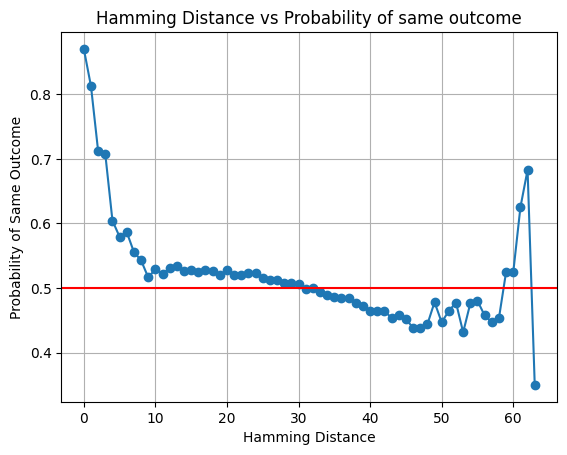

In [68]:
plt.plot(analysis2["hamming_distance"], analysis2["same_outcome_prob"], marker='o')
plt.xlabel("Hamming Distance")
plt.ylabel("Probability of Same Outcome")
plt.title("Hamming Distance vs Probability of same outcome")
plt.axhline(y=0.5, color='r', linestyle='-')
plt.grid(True)
plt.show()

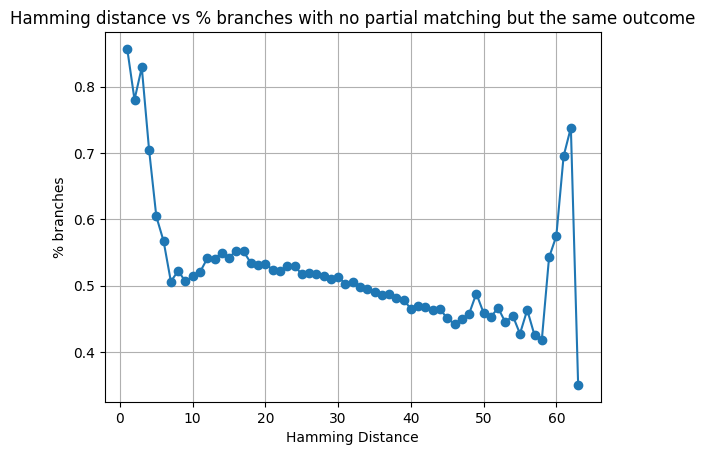

In [82]:
plt.plot(analysis3["hamming_distance"], analysis3["no_partial_matching_same_outcome"]/analysis3["no_partial_matching"], marker='o')
plt.xlabel("Hamming Distance")
plt.ylabel("% branches")
plt.title("Hamming distance vs % branches with no partial matching but the same outcome")
plt.grid(True)
plt.show()

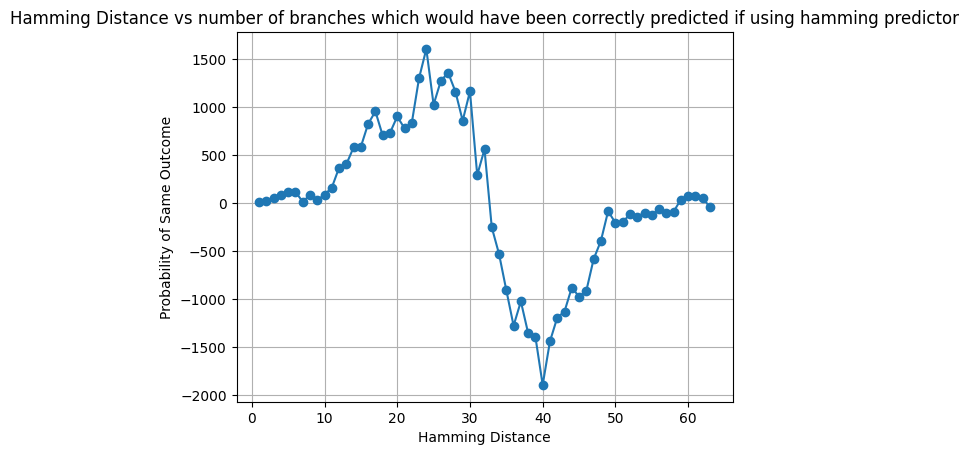

In [80]:
plt.plot(analysis3["hamming_distance"], analysis3["no_partial_matching"]*((analysis3["no_partial_matching_same_outcome"]/analysis3["no_partial_matching"]-0.5)/0.5), marker='o')
plt.xlabel("Hamming Distance")
plt.ylabel("Probability of Same Outcome")
plt.title("Hamming Distance vs number of branches which would have been correctly predicted if using hamming predictor")
plt.grid(True)
plt.show()